# Assignment 1

In [1]:
import numpy as np
import matplotlib as plt

from __future__ import print_function
__author__= 'sjs'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']

In [4]:
mymean = 100

In [6]:
# the chi sq distribution takes the number of degrees of freedom equal to the mean
df = mymean

Text(0.5,1,'Chi Square distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


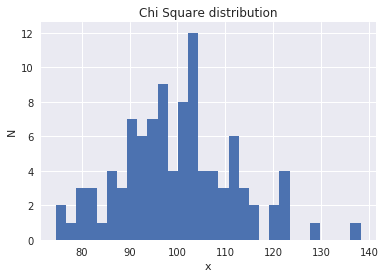

In [8]:
random.seed(42)
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
plt.hist(md['chisq'], bins = 30)
plt.ylabel('N')
plt.xlabel('x')
plt.title('Chi Square distribution')

Figure 1: Chi sq distribution: df = 100, N=100

In [25]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 97.39, standard deviation: 14.26


In [34]:
#100 Chisq distributions
#mysize = (2000 / (np.array(range(1, 100)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[276 869 145 495 952 625 717 431  19 646 631 110 462 915 205 461 461 810
 824 759 365  72 349 679 702 965 453 632 539 150 461 544 950 366 980 542
 242 191 141 452  21 445 988 670 759 119 473 286 894 181 458 588 514 830
 231 377 792 528 402  29 753 972 620 856 516 231  14 653 493 782 694 987
 510 427 286 476 872  42 977 993 597 331 223 276  50 475  57 718 371 199
 544 973 695 491 776 737 891 204 858 301] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


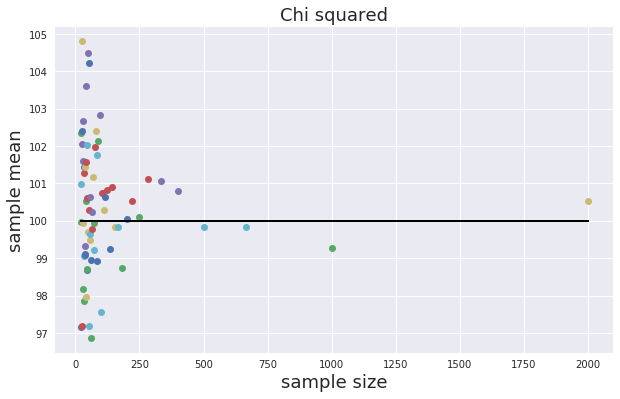

In [29]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

This figure shows the distribution of the mean. There is a convergence in the distribution of points near 100...which is expected due to the central limit theorem. Because of the law of large numbers, the greater the sample size, the closer the mean will be to 100. The law of large numbers refers to the result of when given enough trials, in the long run, the frequency will causes the average to be the probability. 

Text(0.5,1,'Chi Squared Distribution of Means')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


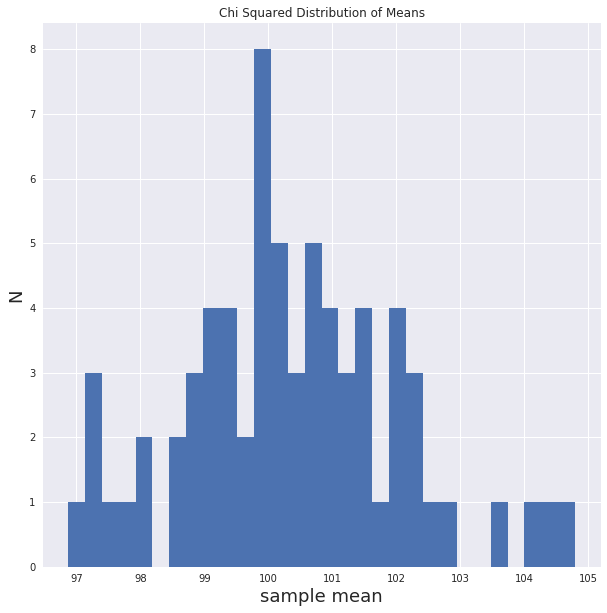

In [36]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('K', fontsize = 18)
pl.title('Chi Squared Distribution of Means')

This shows the distribution of the sample mean for varrying levels of K, or degrees of freedom. Degrees of freedom are the values that can vary. As observed when we plotted the sample size and mean previously, we see a normal distribution with a mean near 100.

# Normal Distribution

In [38]:
distributions = ['gaus']

In [39]:
mymean = 100

In [55]:
# the normal distribution takes the number of degrees of freedom equal to the mean
mu = mymean

Text(0.5,1,'Gaussian distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


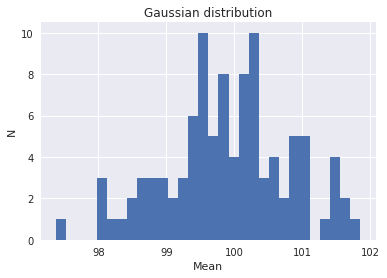

In [57]:
random.seed(42)
md = {}
# md is an empty disctionary
md['gaus'] = np.random.normal(mu, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['gaus'], bins = 30)
pl.ylabel('N')
pl.xlabel('Mean')
pl.title('Gaussian distribution')

Figure 1: Gaussian distribution: N = 100, N=100

In [41]:
print ("Gaussian mean: %.2f, standard deviation: %.2f"%(md['gaus'].mean(), md['gaus'].std()))

Gaussian mean: 99.90, standard deviation: 0.90


In [42]:
#100 Gaussian distributions
#mysize = (2000 / (np.array(range(1, 100)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[417 222 119 337 942 323 518 703 363 971 962 251 497 300 284  36 609 502
  51 278 908 239 144 489 985 242 672 761 237 728 367 632 633 535  90 835
 320 186  40 590 677  16 512 226 645 174 690 386 936 137 341 113 924 877
 257 659 817 555 529 241  93 897 900 633 339 349 725 897 887 779 642  84
 161 898 606   9 101 663   5 160 548 691 651 224 712 237 325 746 649 849
 657 568  93 367 265 243 973 393 892 631] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


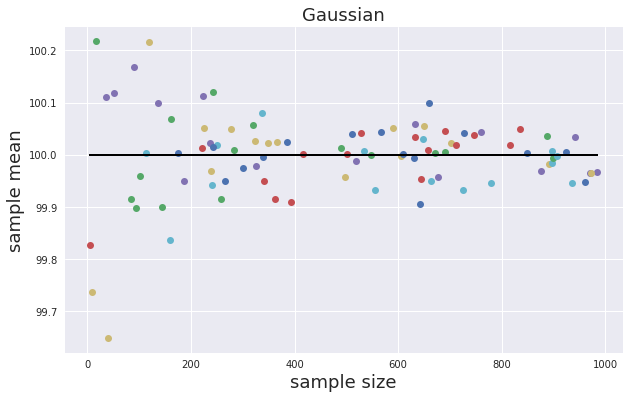

In [43]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['gaus'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['gaus'][n] = np.random.normal(df, size = n)
    
# save the means for plotting later    

md['gaus']['means'] = {}
axgaus_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['gaus']:
    if not type(nn) == str:
        md['gaus']['means'][nn] = md['gaus'][nn].mean()
        #and plot it
        axgaus_mu_n.plot(nn, md['gaus']['means'][nn], 'o')
        axgaus_mu_n.set_xlabel('sample size', fontsize=18)
        axgaus_mu_n.set_ylabel('sample mean', fontsize=18)
        axgaus_mu_n.set_title('Gaussian', fontsize=18)
        axgaus_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

This figure shows the distribution of the mean. Similar to the Chi Square, there is a convergence in the distribution of points near 100...which is expected due to the central limit theorem. Because of the law of large numbers, the greater the sample size, the closer the mean will be to 100. 

Text(0.5,1,'Normal Distribution of Means')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


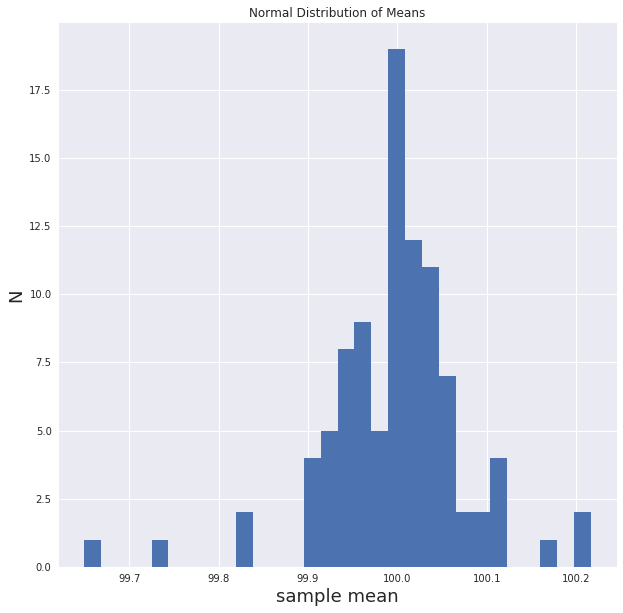

In [44]:
allmeans = list(md['gaus']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Normal Distribution of Means')

This shows the distribution of the sample mean for varrying levels of the sample size N. As observed when we plotted the sample size and mean previously, we see a normal distribution with a mean near 100.

# Poisson Distribution

In [59]:
distributions = ['pois']

In [60]:
lam = 100

In [61]:
# the Poisson distribution takes lam and size
lam = mymean

Text(0.5,1,'Poisson distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


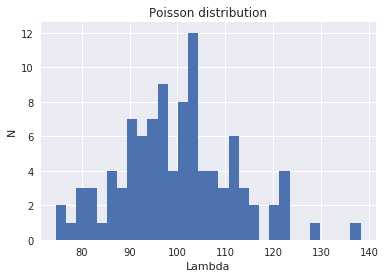

In [63]:
random.seed(42)
md = {}
# md is an empty disctionary
md['pois'] = np.random.chisquare(lam, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('Lambda')
pl.title('Poisson distribution')

Figure 1: Poisson distribution: lam = 100, N=100

In [64]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Poisson mean: 99.97, standard deviation: 11.92


In [65]:
#100 Chisq distributions
#mysize = (2000 / (np.array(range(1, 100)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[649 849 657 568  93 367 265 243 973 393 892 631 794 502 576 492 195 722
 280  24 645 177 940 953 914 370  15 928 428 966 963 853 294 385 851 316
 169 556 936 696 570  97 615 990 140 518 877 740 697 702 359 293 809 810
 867 913 511 501 798 649 701 795 890 337 375  93 578  35 465 542 286 590
  30  37 822 360 127 522 769 215 622  85  51 531 540 637 726 975 516 322
 795 270 438  78  25 962 835 695 408 173] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


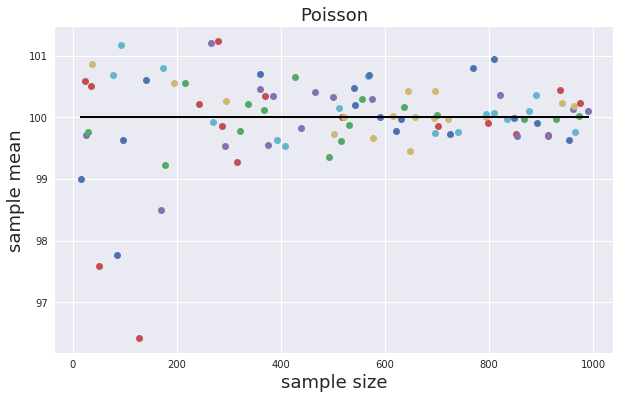

In [67]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['pois'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['pois'][n] = np.random.poisson(lam, size = n)
    
# save the means for plotting later    

md['pois']['means'] = {}
axpois_lam_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_lam_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_lam_n.set_xlabel('sample size', fontsize=18)
        axpois_lam_n.set_ylabel('sample mean', fontsize=18)
        axpois_lam_n.set_title('Poisson', fontsize=18)
        axpois_lam_n.plot([min(mysize), max(mysize)], [df, df], 'k')

This figure shows the distribution of the mean. There is a convergence in the distribution of points near 100...which is expected due to the central limit theorem. Similar to our other distributions, as the number of trials increase, the mean gets tighter to 100. Because of the law of large numbers, the greater the sample size, the closer the mean will be to 100. 

Text(0.5,1,'Poisson Distribution of Means')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


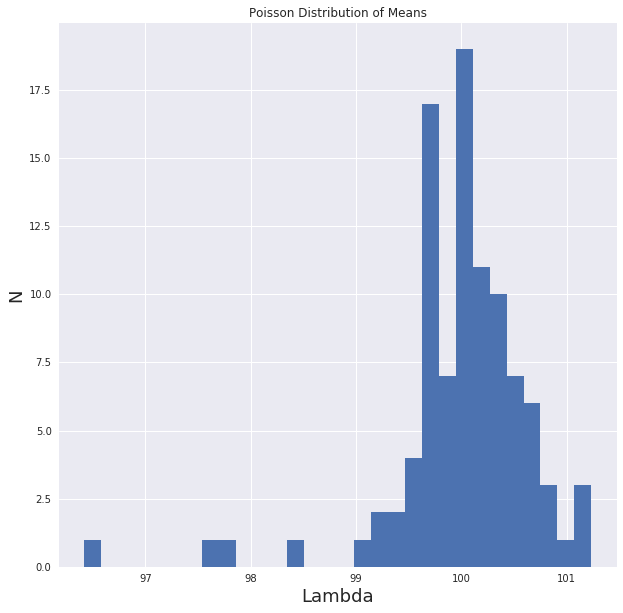

In [69]:
allmeans = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('Lambda', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Poisson Distribution of Means')

This shows the distribution of the sample mean. We see a slightly skewed curve towards the right of 100. However because we have a large sample size, we see a relatively normal distribution with a mean near 100.

# Binomial Distribution

In [70]:
distributions = ['binomial']

In [71]:
np.random.binomial?

In [90]:
# the Binomial distribution takes sample size with probability of success p and size
n = 200
p = .5

Text(0.5,1,'Binomial distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


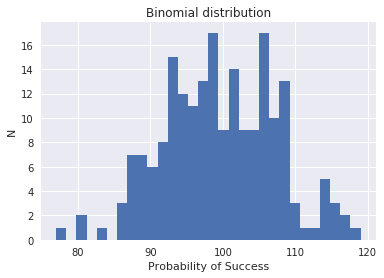

In [80]:
random.seed(42)
md = {}
# md is an empty disctionary
md['binomial'] = np.random.binomial(n,p, size=200)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('Probability of Success')
pl.title('Binomial distribution')

Figure 1: Binomial distribution: p = 50%, n = 200

In [81]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 99.43, standard deviation: 7.75


In [82]:
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[228 671 618 358 113 671 520 772 520 852 551 560 876 403 134  28 755 620
 704 212 136  14 350 589 392 437 904 348 513 783 396 622 862 949 147 926
 492 258 459 980 492 328 633 240  75 128 128 151 138 640 181 345 896 473
 667 172 192  40 168 278 177  88 120 460 206 364 503 690  39 799 627  81
 873 920  61 276 806 748 184 209 370 484 618 368 462 747  36 252 713 895
 511 532 107 447 532 242 269 377  20 322] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


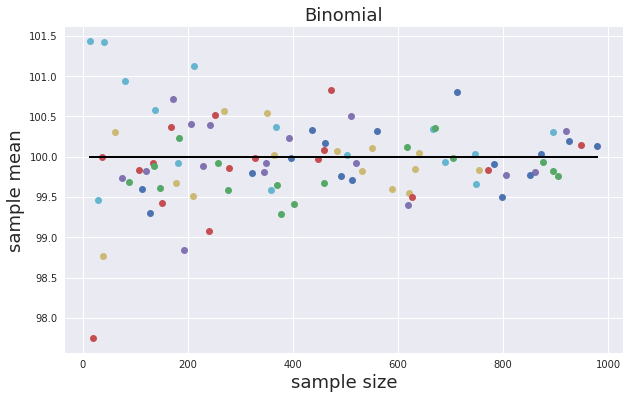

In [91]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['binomial'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for l in mysize:
    md['binomial'][l] = np.random.binomial(n,p, size=l)
    
# save the means for plotting later    

md['binomial']['means'] = {}
axbinomial_n_p = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axbinomial_n_p.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_n_p.set_xlabel('sample size', fontsize=18)
        axbinomial_n_p.set_ylabel('sample mean', fontsize=18)
        axbinomial_n_p.set_title('Binomial', fontsize=18)
        axbinomial_n_p.plot([min(mysize), max(mysize)], [df, df], 'k')

This figure shows the distribution of the mean. There is a convergence in the distribution of points near 100...which is expected due to the central limit theorem. Similar to our other distributions, as the number of trials increase, the mean gets tighter to 100. Because of the law of large numbers, the greater the sample size, the closer the mean will be to 100. 

Text(0.5,1,'Binomial Distribution of Means')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


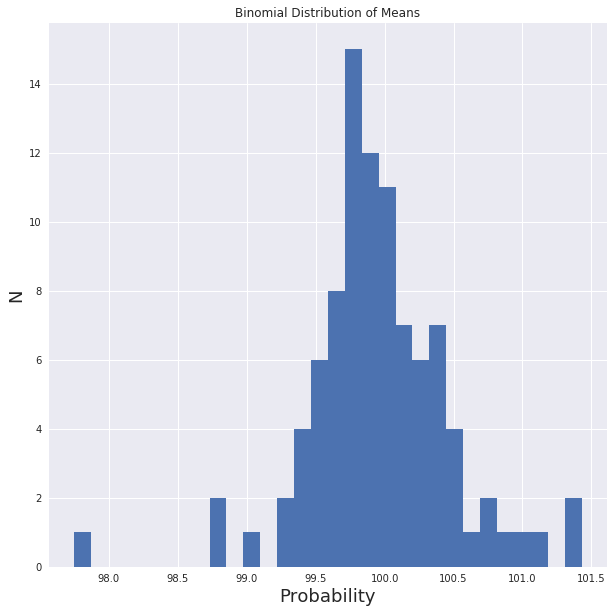

In [93]:
allmeans = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('Probability', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Binomial Distribution of Means')

This shows the distribution of the sample mean. It is looking a lot like a gaussian distribution. 

In [ ]:
Log-Normal Distribution

In [119]:
distributions = ['lnorm']

In [186]:
numpy.random.lognormal?

In [259]:
# the wald distribution takes mean, sd and size
size = 100
mean = 4.605
sigma = .005

Text(0.5,1,'Log Normal Distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


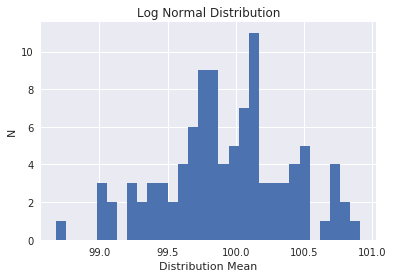

In [260]:
random.seed(42)
md = {}
# md is an empty disctionary
md['lnorm'] = np.random.lognormal(mean,sigma,size)
# md now is a dictionary with one object: an array by the key 'lnorm'
pl.hist(md['lnorm'], bins = 30)
pl.ylabel('N')
pl.xlabel('Distribution Mean')
pl.title('Log Normal Distribution')

Figure 1: Wald distribution: mean = 90, scale = 22 

In [261]:
print ("lnorm mean: %.2f, standard deviation: %.2f"%(md['lnorm'].mean(), md['lnorm'].std()))

lnorm mean: 99.93, standard deviation: 0.45


In [238]:
#100 Chisq distributions
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
#mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


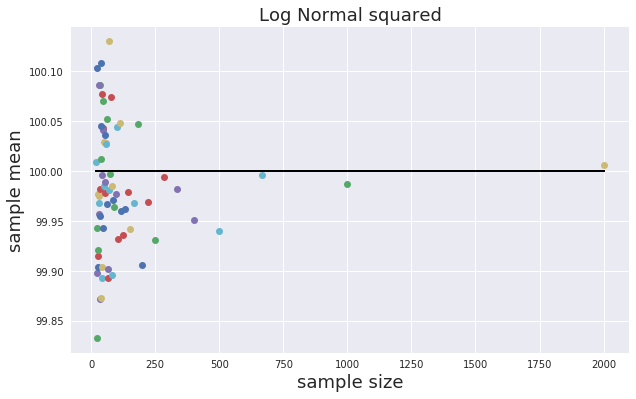

In [262]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['lnorm'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['lnorm'][n] = np.random.lognormal(mean, sigma, size = n)
    
# save the means for plotting later    

md['lnorm']['means'] = {}
axlnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['lnorm']:
    if not type(nn) == str:
        md['lnorm']['means'][nn] = md['lnorm'][nn].mean()
        #and plot it
        axlnorm_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')
        axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axlnorm_mu_n.set_title('Log Normal squared', fontsize=18)
        axlnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

This figure shows the distribution of the mean. There is a convergence in the distribution of points near 100...which is expected due to the central limit theorem. Similar to our other distributions, as the number of trials increase, the mean gets tighter to 100. Because of the law of large numbers, the greater the sample size, the closer the mean will be to 100. 

Text(0.5,1,'Log Normal Distribution of Means')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


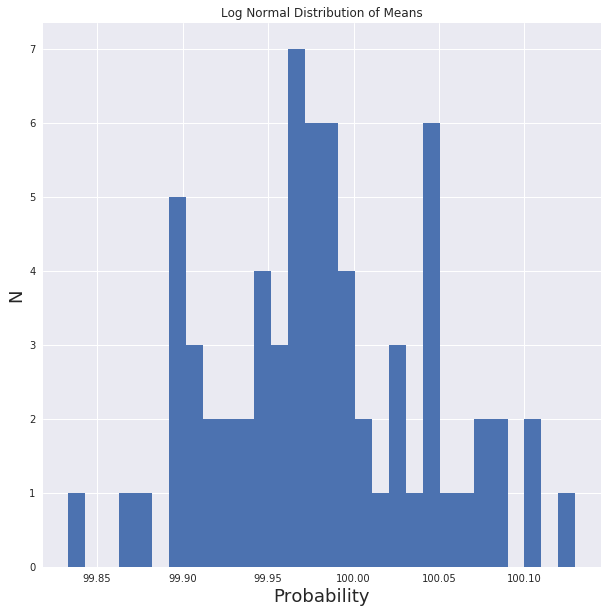

In [263]:
allmeans = list(md['lnorm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('Probability', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Log Normal Distribution of Means')

This plot shows the central limit theorem in action. Where the random distribution from the Log Normal will peak at the mean of 100. We see a relatively normal gaussian curve here. 